# 📊 Global AI Job Market & Salary Trends 2025 – Exploratory Data Analysis

## Dataset Overview

This dataset presents a comprehensive look into the global AI and machine learning job market, covering over 15,000 job listings from more than 50 countries. It includes insights on salaries (normalized to USD), experience levels, company sizes, remote work trends, and in-demand skills. The data is ideal for market analysts, data scientists, and career researchers seeking to understand current hiring and compensation trends in the AI industry.

### Importing Libraries & Dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('ai_job_dataset.csv')

In [5]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [30]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name,posting_month
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,2024-10
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,2024-11
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,2025-03
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,2024-12
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,2025-04


### Data Cleaning & Preliminary Checks

Checking for Missing Values

In [7]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

Checking for Duplicates

In [8]:
df.duplicated().sum()

0

Data Types and Conversion

In [9]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

### Feature Overview

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
job_id,15000,15000,AI00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,15000,20,Machine Learning Researcher,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_usd,15000.0,NaN,NaN,NaN,115348.965133,32519.0,70179.75,99705.0,146408.5,399095.0,60260.940438
salary_currency,15000,3,USD,11957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience_level,15000,4,MI,3781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,15000,4,FT,3812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_location,15000,20,Germany,814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,15000,3,S,5007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employee_residence,15000,20,Sweden,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,15000.0,NaN,NaN,NaN,49.483333,0.0,0.0,50.0,100.0,100.0,40.812712


### Univariate Analysis

Salary Distribution

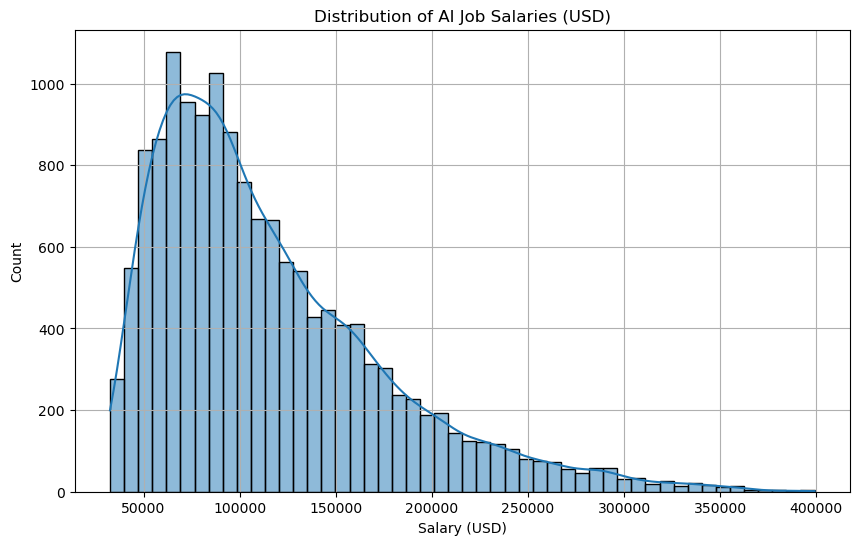

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df['salary_usd'], bins=50, kde=True)
plt.title('Distribution of AI Job Salaries (USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')
plt.grid(True)

Experience Level

Text(0.5, 1.0, 'Experience Level Distribution')

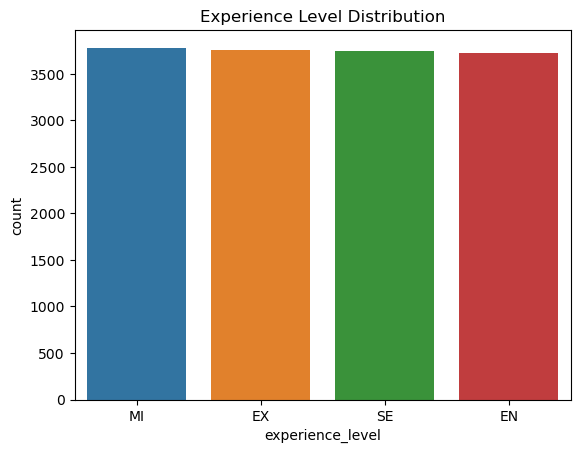

In [12]:
sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index)
plt.title('Experience Level Distribution')

Company Size

Text(0.5, 1.0, 'Company Size Distribution')

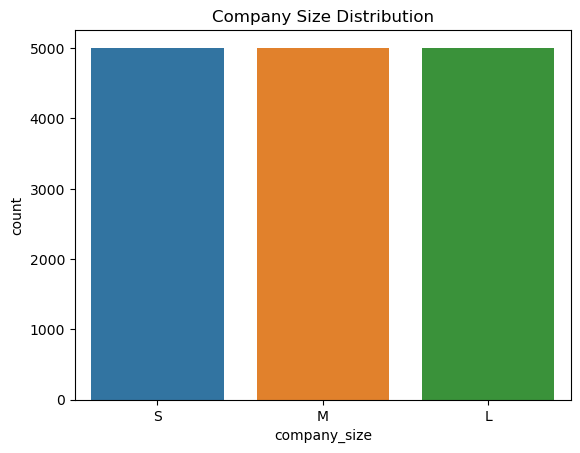

In [13]:
sns.countplot(data=df, x='company_size', order=['S', 'M', 'L'])
plt.title('Company Size Distribution')

Remote Work Ratio

Text(0.5, 1.0, 'Remote Work Distribution')

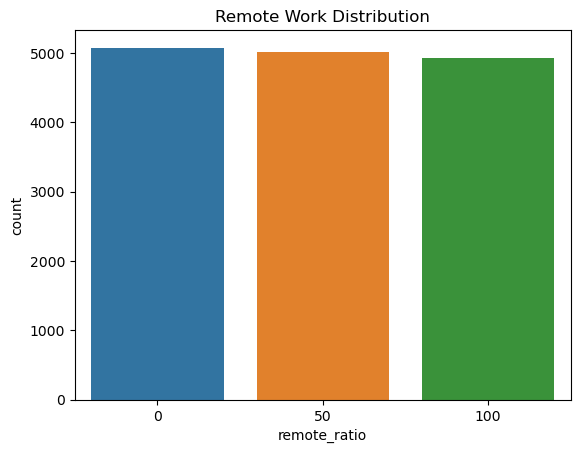

In [14]:
sns.countplot(data=df, x='remote_ratio')
plt.title('Remote Work Distribution')

### Bivariate Analysis

Salary vs Experience Level

Text(0.5, 1.0, 'Salary Distribution by Experience Level')

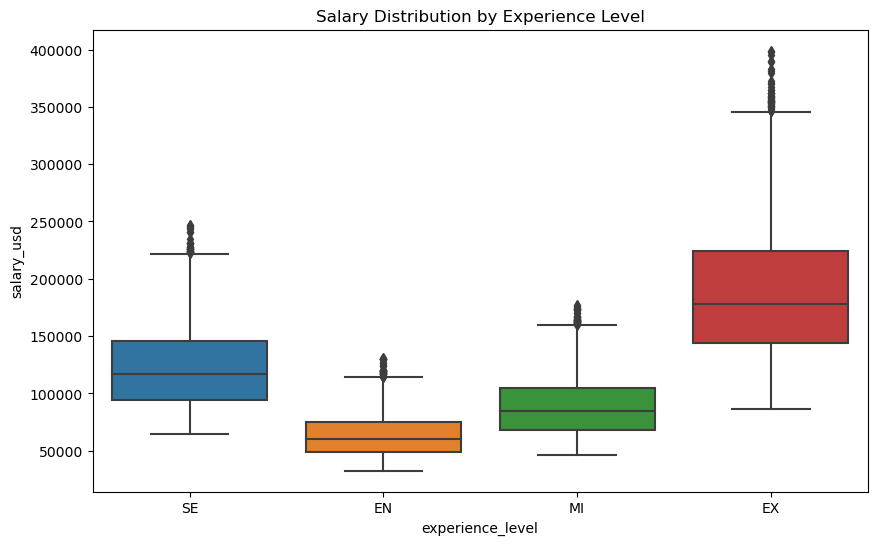

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='experience_level', y='salary_usd')
plt.title('Salary Distribution by Experience Level')

Salary vs Company Size

Text(0.5, 1.0, 'Salary Distribution by Company Size')

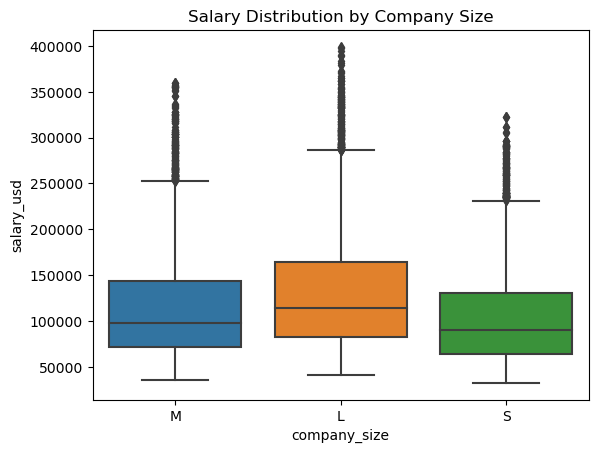

In [16]:
sns.boxplot(data=df, x='company_size', y='salary_usd')
plt.title('Salary Distribution by Company Size')

Salary vs Remote Ratio

Text(0.5, 1.0, 'Salary vs Remote Ratio')

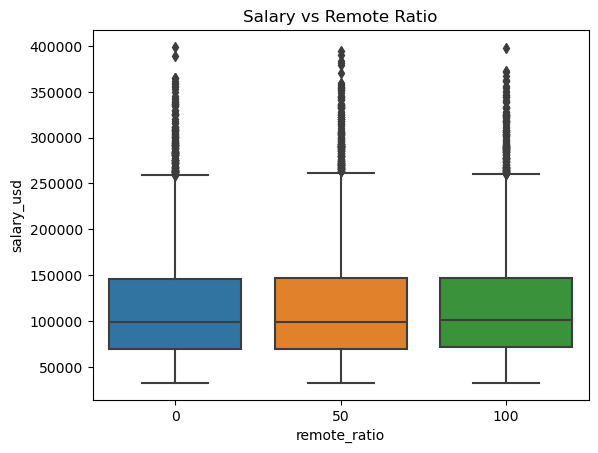

In [17]:
sns.boxplot(data=df, x='remote_ratio', y='salary_usd')
plt.title('Salary vs Remote Ratio')

Years of Experience vs Salary

Text(0.5, 1.0, 'Years of Experience vs Salary')

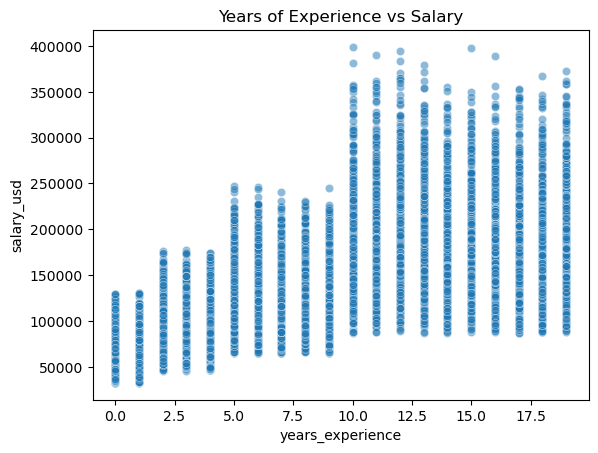

In [18]:
sns.scatterplot(data=df, x='years_experience', y='salary_usd', alpha=0.5)
plt.title('Years of Experience vs Salary')

### Multivariate & Correlation Analysis

Heatmap of Numerical Features

Text(0.5, 1.0, 'Correlation Heatmap')

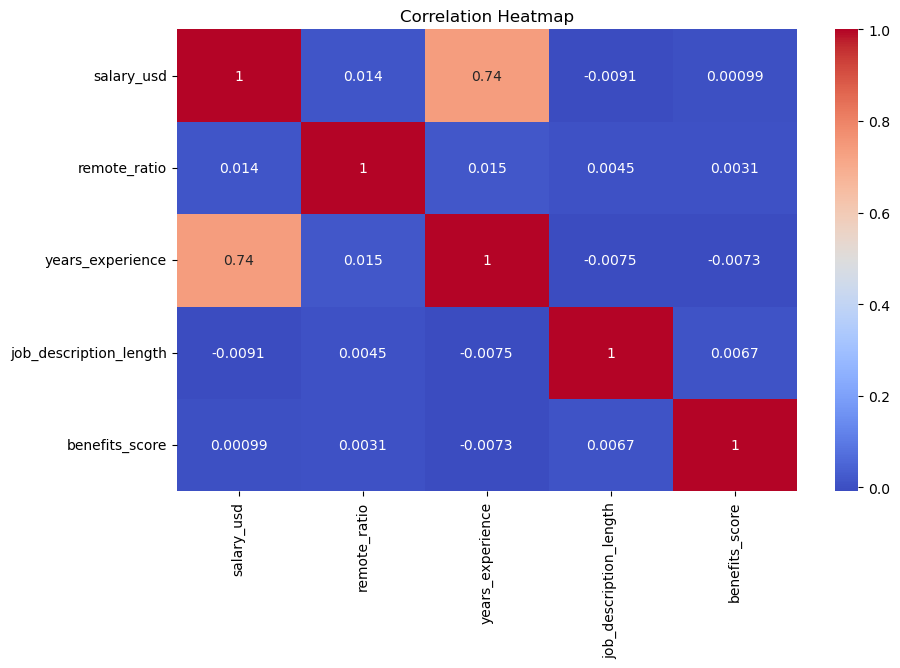

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

### Geographic & Industry Trends

Top 10 Locations by Job Count

Text(0.5, 1.0, 'Top 10 Hiring Locations')

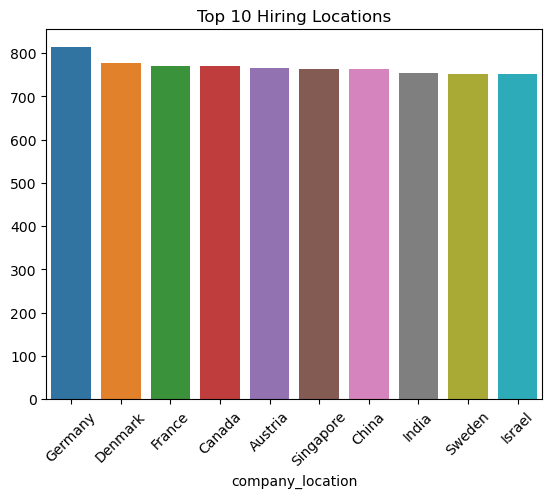

In [20]:
top_locations = df['company_location'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.xticks(rotation=45)
plt.title('Top 10 Hiring Locations')

Average Salary by Industry

<Axes: title={'center': 'Top 10 Industries by Avg Salary'}, xlabel='industry'>

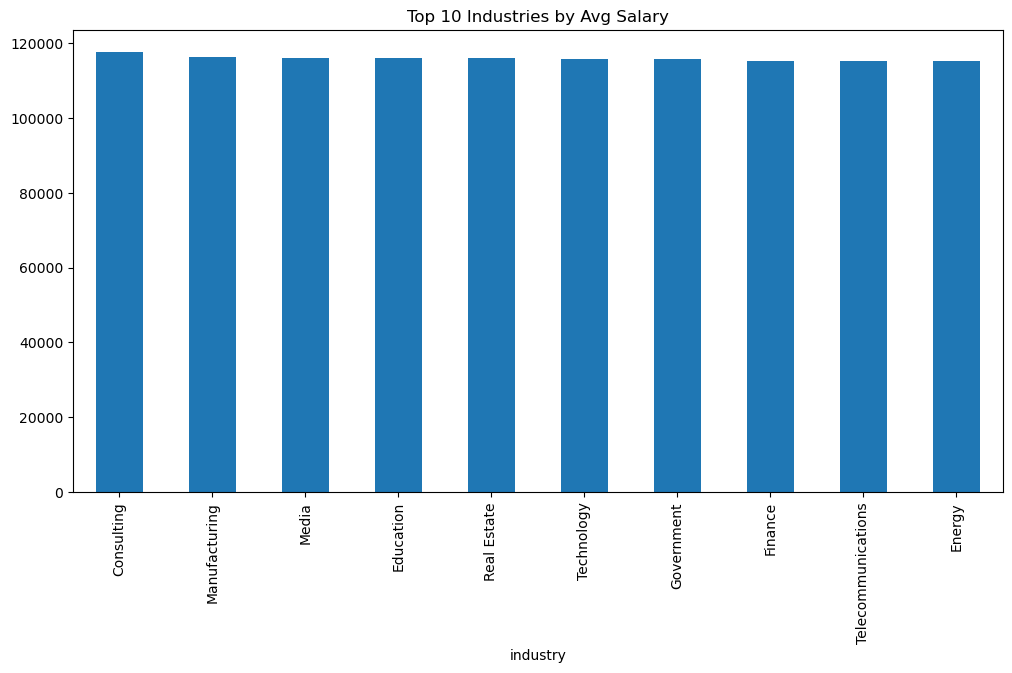

In [21]:
industry_salary = df.groupby('industry')['salary_usd'].mean().sort_values(ascending=False).head(10)
industry_salary.plot(kind='bar', figsize=(12,6), title='Top 10 Industries by Avg Salary')

### Outlier Detection

Text(0.5, 1.0, 'Boxplot to Detect Salary Outliers')

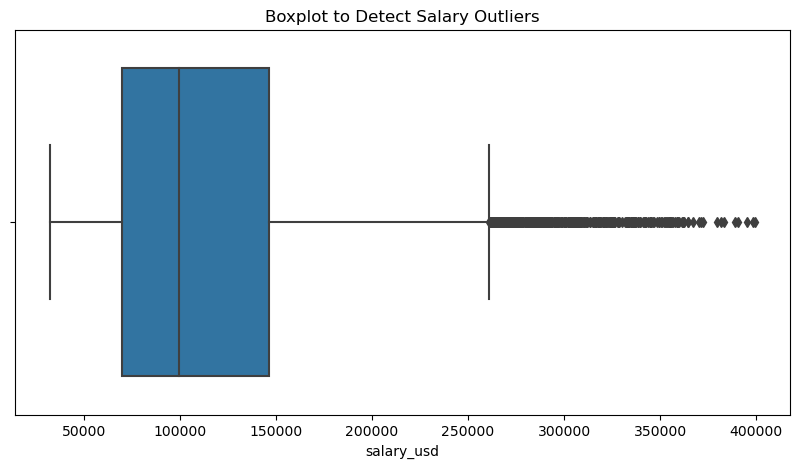

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['salary_usd'])
plt.title('Boxplot to Detect Salary Outliers')

### Time-Based Analysis

<Axes: title={'center': 'Monthly Job Postings Trend'}, xlabel='posting_month'>

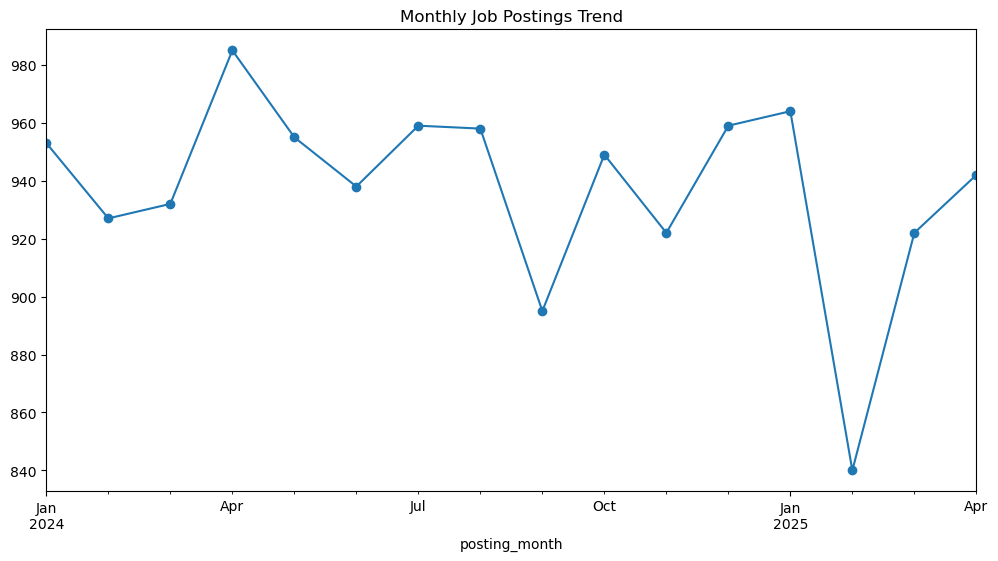

In [23]:
df['posting_month'] = df['posting_date'].dt.to_period('M')
monthly_postings = df.groupby('posting_month').size()

monthly_postings.plot(kind='line', figsize=(12,6), marker='o', title='Monthly Job Postings Trend')

### Hypothesis-Driven Insights

Hypothesis 1: Higher benefits score correlates with higher salary.

Text(0.5, 1.0, 'Benefits Score vs Salary')

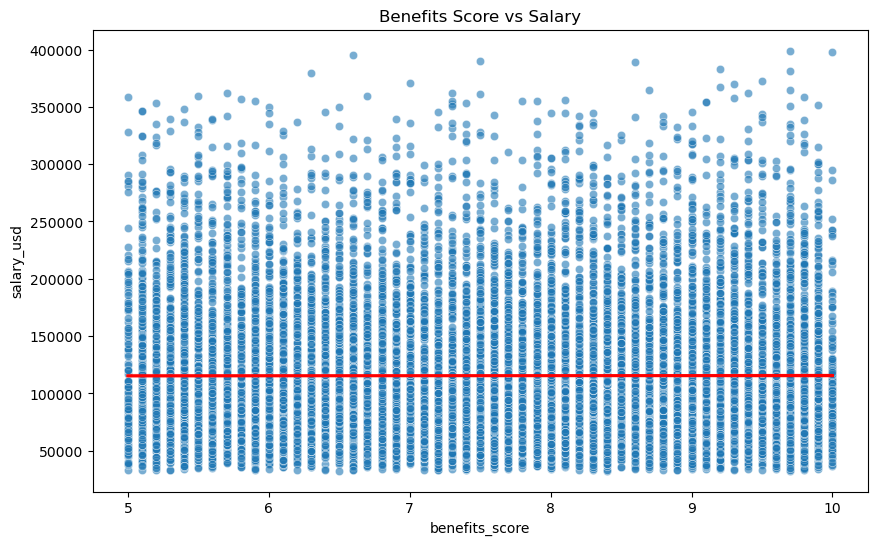

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='benefits_score', y='salary_usd', alpha=0.6)
sns.regplot(data=df, x='benefits_score', y='salary_usd', scatter=False, color='red')
plt.title('Benefits Score vs Salary')

Insight: There is a mild positive trend — companies offering better benefits tend to offer higher salaries. However, the spread suggests benefits alone don’t guarantee high pay.

Hypothesis 2: PhD holders are paid significantly more than others.

Text(0.5, 1.0, 'Salary vs Education Level')

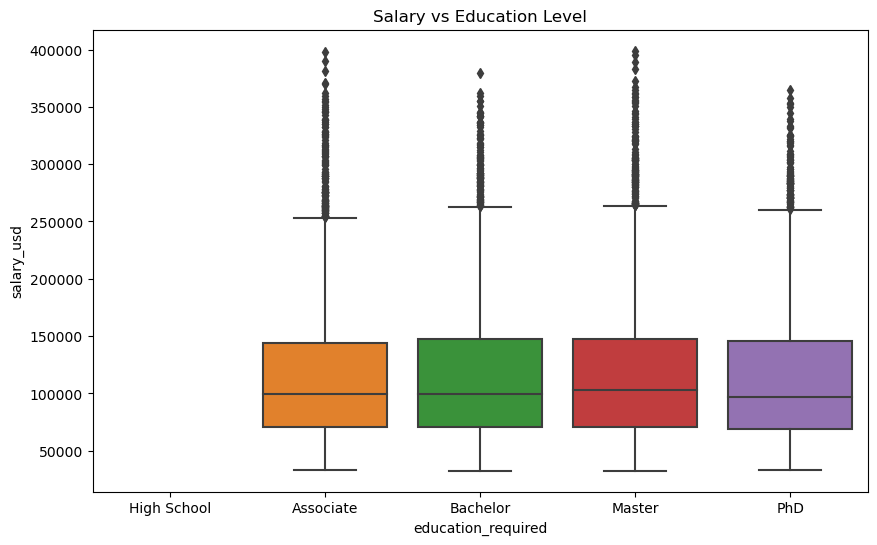

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='education_required', y='salary_usd',
            order=['High School', 'Associate', 'Bachelor', 'Master', 'PhD'])
plt.title('Salary vs Education Level')

Insight: PhD holders have higher median salaries, but also show large variation. Bachelor and Master’s holders also perform competitively, suggesting experience may sometimes compensate for education.

Hypothesis 3: Larger companies offer higher salaries due to larger budgets.

Text(0.5, 1.0, 'Average Salary by Company Size')

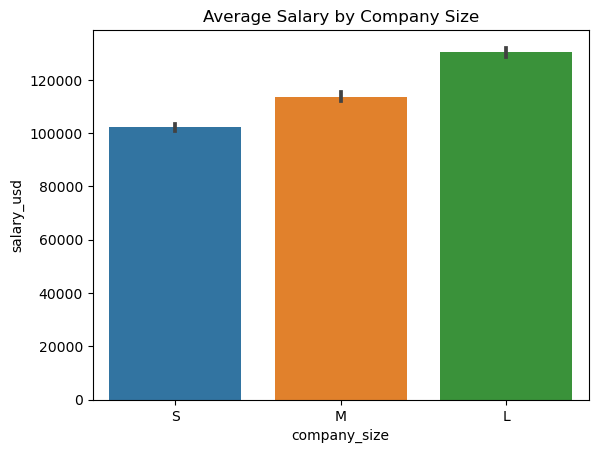

In [27]:
sns.barplot(x='company_size', y='salary_usd', data=df, order=['S', 'M', 'L'])
plt.title('Average Salary by Company Size')

Insight: Large companies (L) offer noticeably higher salaries on average, likely due to better funding and larger operational scales.

Hypothesis 4: AI job descriptions with more content correlate with higher pay.

Text(0.5, 1.0, 'Job Description Length vs Salary')

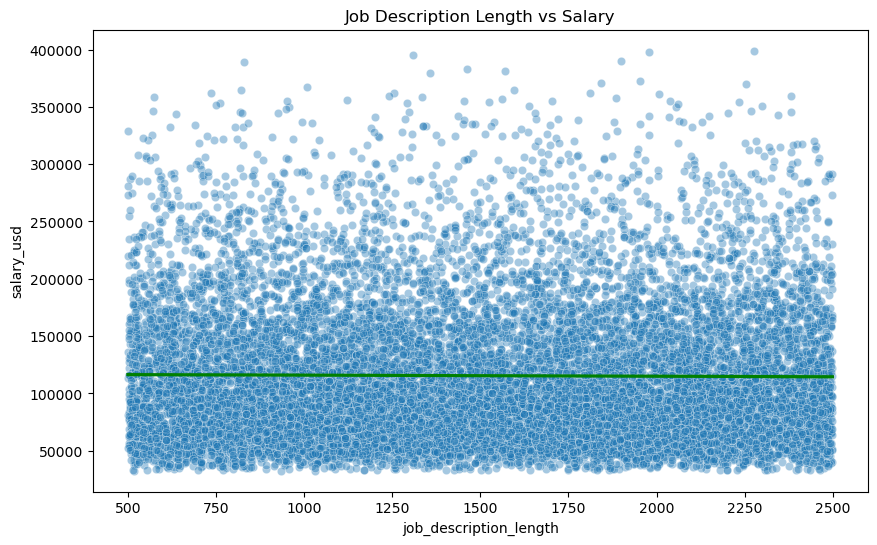

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='job_description_length', y='salary_usd', alpha=0.4)
sns.regplot(data=df, x='job_description_length', y='salary_usd', scatter=False, color='green')
plt.title('Job Description Length vs Salary')

Insight: There is a subtle positive trend — jobs with longer descriptions often demand more responsibilities and offer higher pay.

## Key Takeaways
- Salary Distribution is right-skewed with numerous outliers; most salaries lie between $50k – $150k.
- Experience Level and Education strongly influence salary; executives and PhD holders earn the most.
- Remote Work offers a strategic advantage, often correlating with higher pay.
- Company Size matters — larger firms offer better pay on average.
- Top Hiring Countries include the US, Germany, India, and the UK.
- In-demand Skills like Python, NLP, AWS, and Kubernetes are recurrent across roles.
- Job Posting Dynamics, such as benefits score and description length, are subtle but noteworthy salary indicators.
- Industry Trends show that Tech, Finance, and Healthcare lead in compensation.